In [3]:
import matplotlib.pyplot as plt
import numpy as np

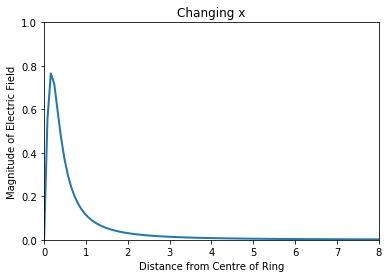

In [21]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 8), ylim=(0, 1))
line, = ax.plot([], [], lw=2)
plt.xlabel('Distance from Centre of Ring')
plt.ylabel('Magnitude of Electric Field')
plt.title('Changing x')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def E_of_ring(x, R=1):
    return x/(x**2 + R**2)**(3/2)


# animation function.  This is called sequentially
def animate(i):
    z_list = np.linspace(0, 8, 100)
    E_list = np.array([2*E_of_ring(x*0.01*i, R=1) for x in z_list])
    line.set_data(z_list, E_list)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('ringofcharge.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()